# MC886 Assigment 1

## Objective:
Use linear regression model to predict the prices of diamonds given their atributes. The data set might be found on:
https://www.kaggle.com/shivam2503/diamonds.


In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from utils import *

In [2]:
data_dir = '../data/diamonds.csv'

In [3]:
with open(data_dir, 'rb') as csvfile:
    dataset = pd.read_csv(data_dir)
    
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
#carat	cut	color	clarity	depth	table	price	x	y	z
# print(dataset['cut'])

## Preprocessing the data

### 1. Split data in training, validation and test
A wise person said: "friends don’t let friends use testing data for training". t.

**Note:**
* **sklearn.model_selection.train_test_split(*arrays, **options)**  
    Split arrays or matrices into random train and test subsets.  
    See documentation:http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 2. Put the dataset into Numpy volume
Categorical atributes are changed to integers.  
The cell bellow runs a code to shuffle and split the dataset into 3 sets, training, validation and test.

### 3. Transform categorical data into numbers
Used fit_transform function.
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
http://pbpython.com/categorical-encoding.html

In [5]:
#RUN THIS ONLY ONCE!
# this code saves the numpy vectors to files
# split_data(dataset)

In [6]:
# lb_make = LabelEncoder()
# print(dataset.shape)
# column = np.empty((dataset.shape[0],1))
# column= lb_make.fit_transform(dataset['cut'])
# # print(dataset['cut'])
# print(dataset['carat'])

In [7]:
#load the numpy files (training set, validation set, test set)
x_train, y_train, x_validation, y_validation, x_test, y_test = load_vectors()
y_train = y_train.reshape((1,y_train.shape[0]))
y_validation = y_validation.reshape((1,y_validation.shape[0]))
y_test = y_test.reshape((1,y_test.shape[0]))
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(9, 30000)
(1, 30000)
(9, 10000)
(1, 10000)
(9, 13940)
(1, 13940)


In [8]:
def init_parameters(X):
    """
    Receives: the input vector shape (nx, m), where nx is the number of features and
    m the number of examples.
    Returns:
    W: the weight array shape ( 1, nx)
    dW: the derivative array shape ( 1, nx)
    b: a real number (bias)
    db: the derivative of the bias.
    """
    nx = X.shape[0]
    W = np.random.randn(nx,1)*0.01
    dw = np.random.randn(nx,1)*0.01
    b = 0.
    db = 0.
    return W,b, dw, db

In [9]:
def l2_cost(X, Y, Y_hat, m):
    """
    Cost function defined by a variation of the l2 norm function.
    The '2' in the denominator makes its deriative easier
    """
    cost = (1.0/(2*m))*np.sum((Y-Y_hat)**2)
    return cost

In [10]:
#FORWARD PROPAGATION (WELL THIS IS NOT A NN, BUT ...)
def forward_prop(X, w, b):
    """
    X is the input vector with m training examples, shape (1,m)
    w: is the angular coefficient shape (9,1)
    b: is the linear coefficient  shape (9,1)
    """
    Y_hat = np.dot(w.T, X) + b
    return Y_hat

In [11]:
def backward_propagation(X,Y, Y_hat, m):
    """
    Calculates the derivatives of the parameters
    returns:
    dw
    db
    """
    nx = X.shape[0]
    ny = Y.shape[0]
    dw = (-1./m)*np.dot(X,(Y -Y_hat).T)
    db = (-1./m)*np.sum((Y -Y_hat))
    assert(dw.shape == (nx, ny))
    return dw, db

In [12]:
def GD_model(X,Y, num_iterations = 100, learning_rate = 0.000000001):
    """
    Arguments:
    X: input array shape (nx, m), nx is the number of input features and m the number of
    training examples.
    Y: label array shape (ny, m) where ny is the number of the output feature.
    Given X and Y estimates the best linear function to fit the data
    """
    m = X.shape[1]
    print('m = ', m) 
    
    w,b,dw,db = init_parameters(x_train)
    for iteration in range(num_iterations):
        
        #forward propagation (we can think the activation function as linear)
        Y_hat = forward_prop(X,w,b)
        
        #plot the cost function
        cost = l2_cost(X,Y, Y_hat,m)
        plt.plot(iteration,cost,'ro')
    
        #Backward propagation calculate the derivatives 
        dw, db = backward_propagation(X,Y,Y_hat, m)
    
        #Update parameters simultaneusly
        temp_w = w - learning_rate*dw
        temp_b = b - learning_rate*db
        w = temp_w
        b = temp_b
    plt.show()
    print("dw.shape = ", dw.shape)
    print("db.shape = ", db.shape)
    print("w.shape = ", w.shape)
    return w, b, cost

m =  30000


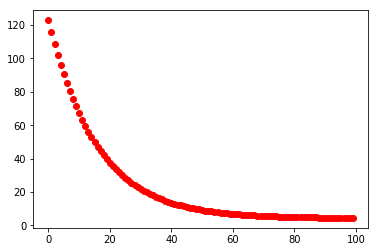

dw.shape =  (9, 1)
db.shape =  ()
w.shape =  (9, 1)
cost in the training set:  4.510222170581803
weights:  [[-0.00367845]
 [-0.0030476 ]
 [-0.00649926]
 [ 0.00479252]
 [-0.01138813]
 [-0.00847227]
 [ 0.00077933]
 [ 0.01849673]
 [-0.00847519]]
bias:  -1.2381023378919105e-07


In [13]:
w_gd, b_gd, cost_gd= GD_model(x_train,y_train)
print("cost in the training set: ", cost_gd)
print("weights: ", w_gd)
print("bias: ", b_gd)

In [14]:
def SGD_model(X,Y, num_iterations = 20, learning_rate = 0.00000001):
    """
    X: an input array shape (nx, m), nx is the input feature size and m is the number of training examples
    Given X and Y estimates the best linear function to fit the data
    """
    # initialize parameters
    w,b,dw,db = init_parameters(x_train)
    print("first ", dw)
    m = X.shape[1]    # number of training examples
    nx = X.shape[0]   # number of features in the input
    ny = Y.shape[0]   # number of features in the label
    
    # for each epoch
    for iteration in range(num_iterations):
        print("\riteração: ", iteration +1, end = "")
        #for each element in the example's vector (shape (9,1))
        Y_hat = np.empty((ny, m))
        for i in range(m):
            #extract a columns of the input, remember the ith column has the ith example
            x_i = X[:, i].reshape(nx,1) #reshape to avoid rank 1 array
            y_i = Y[:, i].reshape(ny,1)
#             print("x_i.shape = ", x_i.shape)
#             print("y_i.shape = ", y_i.shape)
#             print("w.shape = ", w.shape)
            
            #calulate the prediction y_hat
            y_hat_i = np.dot(w.T,x_i) + b
            Y_hat[:,i] = y_hat_i
#             print("y_hat_i.shape = ", y_hat_i.shape)
            
#             #calculate the derivatives
#              dw = (-1./m)*np.dot(X,(Y -Y_hat).T)
#     db = (-1./m)*np.sum((Y -Y_hat))
            
#             dw = 
            dw, db = backward_propagation(x_i,y_i,y_hat_i, 1)
#             print("dw.shape = ", dw.shape)
#             print("db.shape = ", db.shape)
            #Update parameters simultaneusly
            temp_w = w - learning_rate*dw
            temp_b = b - learning_rate*db
            w = temp_w
            b = temp_b
            #plot the cost function
#             cost = (1./(2.))*np.sum((label -Y_hat)**2)
        cost = l2_cost(X,Y, Y_hat,m)
        print("cost = ", cost)
        plt.plot(iteration,cost,'ro')
    plt.show()
    return w, b, cost

first  [[-0.00454602]
 [ 0.01364271]
 [-0.01047708]
 [ 0.01611166]
 [-0.01545561]
 [-0.00567062]
 [-0.01159712]
 [ 0.01980491]
 [ 0.00230036]]
iteração:  1cost =  1.2024307402805428
iteração:  2cost =  0.2694684002563174
iteração:  3cost =  0.13881525030544084
iteração:  4cost =  0.1143005750205627
iteração:  5cost =  0.10822313924469576
iteração:  6cost =  0.10638788654872254
iteração:  7cost =  0.10575868045084993
iteração:  8cost =  0.10551078894379291
iteração:  9cost =  0.10538868148752749
iteração:  10cost =  0.10530872960148752
iteração:  11cost =  0.10524301114403892
iteração:  12cost =  0.10518213843921449
iteração:  13cost =  0.10512294774551456
iteração:  14cost =  0.10506437194490982
iteração:  15cost =  0.10500605095371426
iteração:  16cost =  0.10494786320438268
iteração:  17cost =  0.10488976760206613
iteração:  18cost =  0.10483175020373404
iteração:  19cost =  0.10477380622770596
iteração:  20cost =  0.10471593398354896


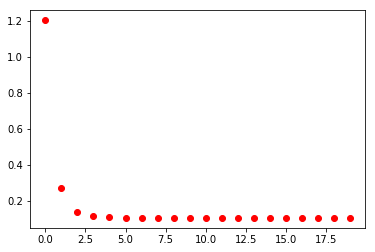

cost in the training set:  0.10471593398354896
weights:  [[ 0.00018052]
 [ 0.00380662]
 [ 0.00078118]
 [-0.00939228]
 [ 0.02916376]
 [ 0.01897547]
 [ 0.00014164]
 [ 0.01189639]
 [ 0.00425824]]
bias:  0.00031607958010859244


In [15]:
w_sgd, b_sgd, cost_sgd = SGD_model(x_train,y_train)
print("cost in the training set: ", cost_sgd)
print("weights: ", w_sgd)
print("bias: ", b_sgd)

In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
clf = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', learning_rate = 'constant', eta0 = 0.00000001)
clf.fit(x_train.T, y_train.T)
# Make predictions using the testing set
y_hat = clf.predict(x_train.T)
# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_train.T, y_hat.T))
train_size = 30000
print("Error: %.2f"
      % l2_cost(x_train, y_train, y_hat, train_size))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train.T, y_hat.T))

# cost [element] = l2_cost(x_train, y_train, y_)
# plt.show()
# print(cost)

Coefficients: 
 [0.00022518 0.00098318 0.00114133 0.00132492 0.02528321 0.02328018
 0.00020155 0.00216987 0.00217918]
Mean squared error: 0.18
Error: 0.09
Variance score: 0.62


/home/ntkm/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ntkm/env/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Normal equation

In [17]:
x0_norm = np.ones((train_size, 1))
X_norm = np.concatenate((x0_norm, x_train.T), axis=1)
# # compute Normal Eq.
XTX_inv = np.linalg.inv(np.matmul(X_norm.T, X_norm))
theta_norm = np.matmul(np.matmul(XTX_inv, X_norm.T), y_train.T)
print('Normal equation compute successfully =D') # check if the system has hanged

Normal equation compute successfully =D


In [18]:
# Test
X_validation_norm = np.concatenate((np.ones((x_validation.shape[1], 1)), x_validation.T), axis=1)
y_validation_norm = y_validation

for i in range(X_validation_norm.shape[0]):
    estimate = np.matmul(theta_norm.T, np.reshape(X_validation_norm[i], (X_norm.shape[1], 1)))
    print('i: %d; estimado: %.3lf; real: %.3lf; diferenca: %.3lf' 
          %(i, estimate, y_validation_norm[:,i], estimate-y_validation_norm[:,i]))

i: 0; estimado: 5.221; real: 5.230; diferenca: -0.009
i: 1; estimado: 4.282; real: 4.300; diferenca: -0.018
i: 2; estimado: 3.694; real: 3.710; diferenca: -0.016
i: 3; estimado: 4.335; real: 4.340; diferenca: -0.005
i: 4; estimado: 2.872; real: 2.880; diferenca: -0.008
i: 5; estimado: 3.516; real: 3.530; diferenca: -0.014
i: 6; estimado: 4.641; real: 4.670; diferenca: -0.029
i: 7; estimado: 3.522; real: 3.530; diferenca: -0.008
i: 8; estimado: 2.702; real: 2.690; diferenca: 0.012
i: 9; estimado: 3.238; real: 3.250; diferenca: -0.012
i: 10; estimado: 4.794; real: 4.800; diferenca: -0.006
i: 11; estimado: 4.052; real: 4.070; diferenca: -0.018
i: 12; estimado: 3.258; real: 3.240; diferenca: 0.018
i: 13; estimado: 2.900; real: 2.910; diferenca: -0.010
i: 14; estimado: 2.877; real: 2.870; diferenca: 0.007
i: 15; estimado: 2.587; real: 2.580; diferenca: 0.007
i: 16; estimado: 2.936; real: 2.940; diferenca: -0.004
i: 17; estimado: 4.347; real: 4.370; diferenca: -0.023
i: 18; estimado: 3.932; 

i: 756; estimado: 3.818; real: 3.830; diferenca: -0.012
i: 757; estimado: 3.337; real: 3.330; diferenca: 0.007
i: 758; estimado: 2.545; real: 2.540; diferenca: 0.005
i: 759; estimado: 3.020; real: 3.010; diferenca: 0.010
i: 760; estimado: 3.088; real: 3.140; diferenca: -0.052
i: 761; estimado: 4.652; real: 4.670; diferenca: -0.018
i: 762; estimado: 2.988; real: 3.030; diferenca: -0.042
i: 763; estimado: 4.579; real: 4.560; diferenca: 0.019
i: 764; estimado: 3.951; real: 3.940; diferenca: 0.011
i: 765; estimado: 2.542; real: 2.530; diferenca: 0.012
i: 766; estimado: 2.721; real: 2.710; diferenca: 0.011
i: 767; estimado: 3.237; real: 3.240; diferenca: -0.003
i: 768; estimado: 3.833; real: 3.820; diferenca: 0.013
i: 769; estimado: 2.999; real: 2.980; diferenca: 0.019
i: 770; estimado: 3.196; real: 3.180; diferenca: 0.016
i: 771; estimado: 4.606; real: 4.580; diferenca: 0.026
i: 772; estimado: 4.716; real: 4.770; diferenca: -0.054
i: 773; estimado: 4.810; real: 4.740; diferenca: 0.070
i: 7

i: 1255; estimado: 4.088; real: 4.100; diferenca: -0.012
i: 1256; estimado: 4.526; real: 4.560; diferenca: -0.034
i: 1257; estimado: 3.299; real: 3.290; diferenca: 0.009
i: 1258; estimado: 2.684; real: 2.680; diferenca: 0.004
i: 1259; estimado: 3.867; real: 3.860; diferenca: 0.007
i: 1260; estimado: 2.893; real: 2.890; diferenca: 0.003
i: 1261; estimado: 2.899; real: 2.880; diferenca: 0.019
i: 1262; estimado: 4.081; real: 4.080; diferenca: 0.001
i: 1263; estimado: 3.860; real: 3.880; diferenca: -0.020
i: 1264; estimado: 3.926; real: 3.920; diferenca: 0.006
i: 1265; estimado: 4.175; real: 4.180; diferenca: -0.005
i: 1266; estimado: 3.602; real: 3.590; diferenca: 0.012
i: 1267; estimado: 2.518; real: 2.510; diferenca: 0.008
i: 1268; estimado: 3.435; real: 3.420; diferenca: 0.015
i: 1269; estimado: 2.978; real: 2.960; diferenca: 0.018
i: 1270; estimado: 4.265; real: 4.260; diferenca: 0.005
i: 1271; estimado: 2.428; real: 2.450; diferenca: -0.022
i: 1272; estimado: 4.219; real: 4.240; dife

i: 1755; estimado: 5.012; real: 5.020; diferenca: -0.008
i: 1756; estimado: 3.333; real: 3.320; diferenca: 0.013
i: 1757; estimado: 3.520; real: 3.530; diferenca: -0.010
i: 1758; estimado: 2.917; real: 2.930; diferenca: -0.013
i: 1759; estimado: 2.698; real: 2.690; diferenca: 0.008
i: 1760; estimado: 2.933; real: 2.930; diferenca: 0.003
i: 1761; estimado: 3.480; real: 3.490; diferenca: -0.010
i: 1762; estimado: 4.934; real: 4.980; diferenca: -0.046
i: 1763; estimado: 4.911; real: 4.890; diferenca: 0.021
i: 1764; estimado: 4.940; real: 5.000; diferenca: -0.060
i: 1765; estimado: 4.285; real: 4.290; diferenca: -0.005
i: 1766; estimado: 3.947; real: 3.950; diferenca: -0.003
i: 1767; estimado: 4.638; real: 4.650; diferenca: -0.012
i: 1768; estimado: 2.743; real: 2.730; diferenca: 0.013
i: 1769; estimado: 3.232; real: 3.250; diferenca: -0.018
i: 1770; estimado: 2.694; real: 2.710; diferenca: -0.016
i: 1771; estimado: 4.575; real: 4.540; diferenca: 0.035
i: 1772; estimado: 3.656; real: 3.670

i: 2254; estimado: 3.734; real: 3.720; diferenca: 0.014
i: 2255; estimado: 4.564; real: 4.560; diferenca: 0.004
i: 2256; estimado: 2.728; real: 2.740; diferenca: -0.012
i: 2257; estimado: 4.056; real: 4.060; diferenca: -0.004
i: 2258; estimado: 2.904; real: 2.890; diferenca: 0.014
i: 2259; estimado: 3.318; real: 3.330; diferenca: -0.012
i: 2260; estimado: 2.685; real: 2.710; diferenca: -0.025
i: 2261; estimado: 4.103; real: 4.100; diferenca: 0.003
i: 2262; estimado: 3.608; real: 3.600; diferenca: 0.008
i: 2263; estimado: 2.723; real: 2.740; diferenca: -0.017
i: 2264; estimado: 3.580; real: 3.600; diferenca: -0.020
i: 2265; estimado: 3.214; real: 3.210; diferenca: 0.004
i: 2266; estimado: 2.956; real: 2.960; diferenca: -0.004
i: 2267; estimado: 3.248; real: 3.230; diferenca: 0.018
i: 2268; estimado: 3.773; real: 3.770; diferenca: 0.003
i: 2269; estimado: 3.927; real: 3.910; diferenca: 0.017
i: 2270; estimado: 5.014; real: 5.020; diferenca: -0.006
i: 2271; estimado: 3.192; real: 3.180; d

i: 2754; estimado: 4.635; real: 4.620; diferenca: 0.015
i: 2755; estimado: 3.572; real: 3.580; diferenca: -0.008
i: 2756; estimado: 4.047; real: 4.060; diferenca: -0.013
i: 2757; estimado: 3.848; real: 3.870; diferenca: -0.022
i: 2758; estimado: 3.637; real: 3.650; diferenca: -0.013
i: 2759; estimado: 2.663; real: 2.670; diferenca: -0.007
i: 2760; estimado: 2.304; real: 2.370; diferenca: -0.066
i: 2761; estimado: 3.989; real: 4.010; diferenca: -0.021
i: 2762; estimado: 3.238; real: 3.240; diferenca: -0.002
i: 2763; estimado: 4.715; real: 4.760; diferenca: -0.045
i: 2764; estimado: 3.068; real: 3.080; diferenca: -0.012
i: 2765; estimado: 3.601; real: 3.590; diferenca: 0.011
i: 2766; estimado: 2.623; real: 2.640; diferenca: -0.017
i: 2767; estimado: 3.859; real: 3.880; diferenca: -0.021
i: 2768; estimado: 3.559; real: 3.550; diferenca: 0.009
i: 2769; estimado: 4.200; real: 4.200; diferenca: -0.000
i: 2770; estimado: 3.798; real: 3.810; diferenca: -0.012
i: 2771; estimado: 4.251; real: 4.

i: 3253; estimado: 4.888; real: 4.900; diferenca: -0.012
i: 3254; estimado: 3.150; real: 3.160; diferenca: -0.010
i: 3255; estimado: 2.889; real: 2.900; diferenca: -0.011
i: 3256; estimado: 2.813; real: 2.790; diferenca: 0.023
i: 3257; estimado: 3.584; real: 3.590; diferenca: -0.006
i: 3258; estimado: 3.176; real: 3.160; diferenca: 0.016
i: 3259; estimado: 2.644; real: 2.660; diferenca: -0.016
i: 3260; estimado: 4.074; real: 4.060; diferenca: 0.014
i: 3261; estimado: 4.659; real: 4.700; diferenca: -0.041
i: 3262; estimado: 3.546; real: 3.530; diferenca: 0.016
i: 3263; estimado: 4.270; real: 4.300; diferenca: -0.030
i: 3264; estimado: 3.363; real: 3.370; diferenca: -0.007
i: 3265; estimado: 3.182; real: 3.190; diferenca: -0.008
i: 3266; estimado: 2.722; real: 2.710; diferenca: 0.012
i: 3267; estimado: 3.861; real: 3.860; diferenca: 0.001
i: 3268; estimado: 3.840; real: 3.860; diferenca: -0.020
i: 3269; estimado: 3.887; real: 0.000; diferenca: 3.887
i: 3270; estimado: 2.711; real: 2.730;

i: 3753; estimado: 3.542; real: 3.540; diferenca: 0.002
i: 3754; estimado: 3.168; real: 3.190; diferenca: -0.022
i: 3755; estimado: 2.753; real: 2.730; diferenca: 0.023
i: 3756; estimado: 4.003; real: 4.030; diferenca: -0.027
i: 3757; estimado: 3.872; real: 3.880; diferenca: -0.008
i: 3758; estimado: 2.788; real: 2.800; diferenca: -0.012
i: 3759; estimado: 3.493; real: 3.490; diferenca: 0.003
i: 3760; estimado: 2.915; real: 2.930; diferenca: -0.015
i: 3761; estimado: 3.538; real: 3.540; diferenca: -0.002
i: 3762; estimado: 2.676; real: 2.660; diferenca: 0.016
i: 3763; estimado: 3.730; real: 3.760; diferenca: -0.030
i: 3764; estimado: 4.501; real: 4.510; diferenca: -0.009
i: 3765; estimado: 3.526; real: 3.530; diferenca: -0.004
i: 3766; estimado: 3.931; real: 3.950; diferenca: -0.019
i: 3767; estimado: 4.799; real: 4.850; diferenca: -0.051
i: 3768; estimado: 2.993; real: 3.000; diferenca: -0.007
i: 3769; estimado: 3.324; real: 3.340; diferenca: -0.016
i: 3770; estimado: 4.983; real: 4.9

i: 4252; estimado: 3.568; real: 3.550; diferenca: 0.018
i: 4253; estimado: 3.210; real: 3.210; diferenca: -0.000
i: 4254; estimado: 2.751; real: 2.720; diferenca: 0.031
i: 4255; estimado: 3.342; real: 3.330; diferenca: 0.012
i: 4256; estimado: 3.543; real: 3.550; diferenca: -0.007
i: 4257; estimado: 2.422; real: 2.440; diferenca: -0.018
i: 4258; estimado: 3.504; real: 3.490; diferenca: 0.014
i: 4259; estimado: 4.120; real: 4.140; diferenca: -0.020
i: 4260; estimado: 5.020; real: 5.040; diferenca: -0.020
i: 4261; estimado: 4.039; real: 4.050; diferenca: -0.011
i: 4262; estimado: 3.527; real: 3.540; diferenca: -0.013
i: 4263; estimado: 2.571; real: 2.580; diferenca: -0.009
i: 4264; estimado: 3.704; real: 3.720; diferenca: -0.016
i: 4265; estimado: 2.959; real: 2.960; diferenca: -0.001
i: 4266; estimado: 2.680; real: 2.670; diferenca: 0.010
i: 4267; estimado: 3.518; real: 3.520; diferenca: -0.002
i: 4268; estimado: 2.687; real: 2.690; diferenca: -0.003
i: 4269; estimado: 3.845; real: 3.87

i: 5067; estimado: 3.454; real: 3.460; diferenca: -0.006
i: 5068; estimado: 4.545; real: 4.540; diferenca: 0.005
i: 5069; estimado: 2.746; real: 2.700; diferenca: 0.046
i: 5070; estimado: 2.818; real: 2.800; diferenca: 0.018
i: 5071; estimado: 3.499; real: 3.490; diferenca: 0.009
i: 5072; estimado: 2.736; real: 2.710; diferenca: 0.026
i: 5073; estimado: 4.231; real: 4.230; diferenca: 0.001
i: 5074; estimado: 4.666; real: 4.660; diferenca: 0.006
i: 5075; estimado: 3.911; real: 3.920; diferenca: -0.009
i: 5076; estimado: 3.867; real: 3.880; diferenca: -0.013
i: 5077; estimado: 4.046; real: 4.070; diferenca: -0.024
i: 5078; estimado: 3.233; real: 3.250; diferenca: -0.017
i: 5079; estimado: 4.528; real: 4.560; diferenca: -0.032
i: 5080; estimado: 2.723; real: 2.710; diferenca: 0.013
i: 5081; estimado: 3.961; real: 3.960; diferenca: 0.001
i: 5082; estimado: 4.621; real: 4.640; diferenca: -0.019
i: 5083; estimado: 3.154; real: 3.150; diferenca: 0.004
i: 5084; estimado: 3.964; real: 3.980; di

i: 5251; estimado: 2.651; real: 2.640; diferenca: 0.011
i: 5252; estimado: 2.823; real: 2.820; diferenca: 0.003
i: 5253; estimado: 3.866; real: 3.880; diferenca: -0.014
i: 5254; estimado: 2.848; real: 2.840; diferenca: 0.008
i: 5255; estimado: 4.412; real: 4.350; diferenca: 0.062
i: 5256; estimado: 3.865; real: 3.840; diferenca: 0.025
i: 5257; estimado: 5.029; real: 5.030; diferenca: -0.001
i: 5258; estimado: 4.558; real: 4.550; diferenca: 0.008
i: 5259; estimado: 2.924; real: 2.910; diferenca: 0.014
i: 5260; estimado: 2.611; real: 2.630; diferenca: -0.019
i: 5261; estimado: 2.917; real: 2.900; diferenca: 0.017
i: 5262; estimado: 2.921; real: 2.940; diferenca: -0.019
i: 5263; estimado: 2.664; real: 2.660; diferenca: 0.004
i: 5264; estimado: 3.945; real: 3.940; diferenca: 0.005
i: 5265; estimado: 2.754; real: 2.730; diferenca: 0.024
i: 5266; estimado: 3.252; real: 3.240; diferenca: 0.012
i: 5267; estimado: 2.586; real: 2.600; diferenca: -0.014
i: 5268; estimado: 2.713; real: 2.680; dife

i: 6065; estimado: 3.218; real: 3.200; diferenca: 0.018
i: 6066; estimado: 2.990; real: 2.980; diferenca: 0.010
i: 6067; estimado: 4.493; real: 4.510; diferenca: -0.017
i: 6068; estimado: 2.805; real: 2.840; diferenca: -0.035
i: 6069; estimado: 3.254; real: 3.250; diferenca: 0.004
i: 6070; estimado: 4.008; real: 4.000; diferenca: 0.008
i: 6071; estimado: 3.556; real: 3.570; diferenca: -0.014
i: 6072; estimado: 4.086; real: 3.930; diferenca: 0.156
i: 6073; estimado: 3.952; real: 3.950; diferenca: 0.002
i: 6074; estimado: 4.536; real: 4.560; diferenca: -0.024
i: 6075; estimado: 4.055; real: 4.070; diferenca: -0.015
i: 6076; estimado: 3.167; real: 3.170; diferenca: -0.003
i: 6077; estimado: 2.718; real: 2.720; diferenca: -0.002
i: 6078; estimado: 4.502; real: 4.550; diferenca: -0.048
i: 6079; estimado: 3.575; real: 3.570; diferenca: 0.005
i: 6080; estimado: 2.422; real: 2.430; diferenca: -0.008
i: 6081; estimado: 2.691; real: 2.690; diferenca: 0.001
i: 6082; estimado: 3.452; real: 3.470; 

i: 6716; estimado: 3.973; real: 3.980; diferenca: -0.007
i: 6717; estimado: 3.153; real: 3.160; diferenca: -0.007
i: 6718; estimado: 3.217; real: 3.210; diferenca: 0.007
i: 6719; estimado: 3.911; real: 3.930; diferenca: -0.019
i: 6720; estimado: 2.721; real: 2.710; diferenca: 0.011
i: 6721; estimado: 3.179; real: 3.180; diferenca: -0.001
i: 6722; estimado: 3.230; real: 3.220; diferenca: 0.010
i: 6723; estimado: 4.716; real: 4.720; diferenca: -0.004
i: 6724; estimado: 3.274; real: 3.280; diferenca: -0.006
i: 6725; estimado: 3.563; real: 3.550; diferenca: 0.013
i: 6726; estimado: 2.598; real: 2.580; diferenca: 0.018
i: 6727; estimado: 2.835; real: 2.850; diferenca: -0.015
i: 6728; estimado: 3.198; real: 3.210; diferenca: -0.012
i: 6729; estimado: 4.027; real: 4.030; diferenca: -0.003
i: 6730; estimado: 3.016; real: 3.010; diferenca: 0.006
i: 6731; estimado: 3.320; real: 3.310; diferenca: 0.010
i: 6732; estimado: 4.572; real: 4.570; diferenca: 0.002
i: 6733; estimado: 3.572; real: 3.600; 

i: 7250; estimado: 2.895; real: 2.910; diferenca: -0.015
i: 7251; estimado: 4.240; real: 4.230; diferenca: 0.010
i: 7252; estimado: 2.976; real: 2.960; diferenca: 0.016
i: 7253; estimado: 2.879; real: 2.870; diferenca: 0.009
i: 7254; estimado: 5.079; real: 5.080; diferenca: -0.001
i: 7255; estimado: 2.700; real: 2.690; diferenca: 0.010
i: 7256; estimado: 2.538; real: 2.570; diferenca: -0.032
i: 7257; estimado: 3.542; real: 3.550; diferenca: -0.008
i: 7258; estimado: 2.954; real: 2.960; diferenca: -0.006
i: 7259; estimado: 3.780; real: 3.770; diferenca: 0.010
i: 7260; estimado: 2.868; real: 2.850; diferenca: 0.018
i: 7261; estimado: 4.052; real: 4.040; diferenca: 0.012
i: 7262; estimado: 4.119; real: 4.080; diferenca: 0.039
i: 7263; estimado: 3.046; real: 3.040; diferenca: 0.006
i: 7264; estimado: 2.733; real: 2.730; diferenca: 0.003
i: 7265; estimado: 2.665; real: 2.670; diferenca: -0.005
i: 7266; estimado: 3.694; real: 3.690; diferenca: 0.004
i: 7267; estimado: 4.103; real: 4.130; dif

i: 7749; estimado: 2.729; real: 2.730; diferenca: -0.001
i: 7750; estimado: 4.508; real: 4.530; diferenca: -0.022
i: 7751; estimado: 3.925; real: 3.920; diferenca: 0.005
i: 7752; estimado: 3.641; real: 3.630; diferenca: 0.011
i: 7753; estimado: 3.433; real: 3.440; diferenca: -0.007
i: 7754; estimado: 3.959; real: 3.940; diferenca: 0.019
i: 7755; estimado: 2.735; real: 2.750; diferenca: -0.015
i: 7756; estimado: 2.970; real: 2.970; diferenca: -0.000
i: 7757; estimado: 3.172; real: 3.190; diferenca: -0.018
i: 7758; estimado: 4.214; real: 4.230; diferenca: -0.016
i: 7759; estimado: 2.787; real: 2.760; diferenca: 0.027
i: 7760; estimado: 2.622; real: 2.630; diferenca: -0.008
i: 7761; estimado: 3.390; real: 3.400; diferenca: -0.010
i: 7762; estimado: 2.774; real: 2.760; diferenca: 0.014
i: 7763; estimado: 3.555; real: 3.560; diferenca: -0.005
i: 7764; estimado: 4.671; real: 4.670; diferenca: 0.001
i: 7765; estimado: 4.528; real: 4.510; diferenca: 0.018
i: 7766; estimado: 3.739; real: 3.740;

i: 8249; estimado: 2.664; real: 2.650; diferenca: 0.014
i: 8250; estimado: 2.633; real: 2.650; diferenca: -0.017
i: 8251; estimado: 3.339; real: 3.290; diferenca: 0.049
i: 8252; estimado: 4.470; real: 4.490; diferenca: -0.020
i: 8253; estimado: 4.490; real: 4.450; diferenca: 0.040
i: 8254; estimado: 2.525; real: 2.570; diferenca: -0.045
i: 8255; estimado: 3.974; real: 3.960; diferenca: 0.014
i: 8256; estimado: 2.731; real: 2.730; diferenca: 0.001
i: 8257; estimado: 3.574; real: 3.580; diferenca: -0.006
i: 8258; estimado: 4.050; real: 4.050; diferenca: -0.000
i: 8259; estimado: 2.988; real: 2.970; diferenca: 0.018
i: 8260; estimado: 4.287; real: 4.290; diferenca: -0.003
i: 8261; estimado: 3.837; real: 3.850; diferenca: -0.013
i: 8262; estimado: 3.232; real: 3.240; diferenca: -0.008
i: 8263; estimado: 4.577; real: 4.590; diferenca: -0.013
i: 8264; estimado: 3.530; real: 3.540; diferenca: -0.010
i: 8265; estimado: 2.856; real: 2.860; diferenca: -0.004
i: 8266; estimado: 4.563; real: 4.560

i: 8748; estimado: 4.021; real: 4.050; diferenca: -0.029
i: 8749; estimado: 3.769; real: 3.740; diferenca: 0.029
i: 8750; estimado: 2.681; real: 2.680; diferenca: 0.001
i: 8751; estimado: 2.918; real: 2.940; diferenca: -0.022
i: 8752; estimado: 3.195; real: 3.200; diferenca: -0.005
i: 8753; estimado: 3.591; real: 3.580; diferenca: 0.011
i: 8754; estimado: 3.185; real: 3.200; diferenca: -0.015
i: 8755; estimado: 3.456; real: 3.450; diferenca: 0.006
i: 8756; estimado: 2.831; real: 2.830; diferenca: 0.001
i: 8757; estimado: 4.462; real: 4.520; diferenca: -0.058
i: 8758; estimado: 4.428; real: 4.440; diferenca: -0.012
i: 8759; estimado: 2.667; real: 2.680; diferenca: -0.013
i: 8760; estimado: 3.252; real: 3.240; diferenca: 0.012
i: 8761; estimado: 2.751; real: 2.730; diferenca: 0.021
i: 8762; estimado: 3.566; real: 3.550; diferenca: 0.016
i: 8763; estimado: 2.869; real: 2.910; diferenca: -0.041
i: 8764; estimado: 2.651; real: 2.650; diferenca: 0.001
i: 8765; estimado: 3.949; real: 3.970; d

i: 9662; estimado: 4.630; real: 4.570; diferenca: 0.060
i: 9663; estimado: 3.778; real: 3.790; diferenca: -0.012
i: 9664; estimado: 4.515; real: 4.520; diferenca: -0.005
i: 9665; estimado: 3.283; real: 3.290; diferenca: -0.007
i: 9666; estimado: 3.192; real: 3.200; diferenca: -0.008
i: 9667; estimado: 3.512; real: 3.500; diferenca: 0.012
i: 9668; estimado: 4.226; real: 4.220; diferenca: 0.006
i: 9669; estimado: 3.000; real: 2.990; diferenca: 0.010
i: 9670; estimado: 3.303; real: 3.290; diferenca: 0.013
i: 9671; estimado: 2.661; real: 2.660; diferenca: 0.001
i: 9672; estimado: 2.929; real: 2.930; diferenca: -0.001
i: 9673; estimado: 3.551; real: 3.560; diferenca: -0.009
i: 9674; estimado: 4.015; real: 4.020; diferenca: -0.005
i: 9675; estimado: 4.610; real: 4.570; diferenca: 0.040
i: 9676; estimado: 3.177; real: 3.150; diferenca: 0.027
i: 9677; estimado: 3.555; real: 3.560; diferenca: -0.005
i: 9678; estimado: 3.171; real: 3.180; diferenca: -0.009
i: 9679; estimado: 2.688; real: 2.680; 

MINIBATCH
---

In [20]:
def hypotesis(theta, X):
    return np.matmul(theta.T, X)

In [27]:
batch_size = 64
n_epoch = 100
batches_per_epoch = int(np.ceil(train_size / float(batch_size)))
# n_steps = int(round(batches_per_epoch * n_epoch))
n_steps = 20
learning_rate = 0.00000000001
cost_mbgd = np.zeros((n_steps))

print('training size: ', X_mbgd.shape)
print('number of epoch: ', n_epoch)
print('batches per epoch: ', batches_per_epoch)
print('number of steps: ', n_steps)

training size:  (30000, 10)
number of epoch:  100
batches per epoch:  469
number of steps:  20


In [33]:
from sklearn.utils import shuffle

theta_mbgd = np.random.rand(x_train.shape[0] + 1, 1) * 0.01
x0_mbgd = np.ones((train_size, 1))
X_mbgd = np.concatenate((x0_mbgd, x_train.T), axis=1)
y_train_mbgd = np.copy(y_train)
print('theta shape', theta_mbgd.shape)
print('x shape', X_mbgd.shape, y_train_mbgd.shape)

for j in range(n_steps):
#     X_mbgd, tmp = shuffle(X_mbgd, y_train_mbgd.T, random_state=0) #TODO
#     y_train_mbgd = tmp.T
    for i in range(0, train_size, batch_size):
        h = hypotesis(theta_mbgd, X_mbgd[i:i+batch_size, :].T)
        cost_mbgd[j] = l2_cost(theta_mbgd, h, y_train_mbgd[:, i:i+batch_size], batch_size)
#         dw = (-1./m)*np.dot(X,(Y -Y_hat).T)
        theta_mbgd = theta_mbgd - (learning_rate  * np.sum(np.dot((h - y_train_mbgd[:, i:i+batch_size]), X_mbgd[i:i+batch_size, :]))) / batch_size
#         theta_mbgd = theta_mbgd - (learning_rate  * np.sum((h - np.sum(y_train_mbgd[:, i:i+batch_size]))) / batch_size)
    print('j: %d;\tcost: %.3lf' %(j, cost_mbgd[j]))

theta shape (10, 1)
x shape (30000, 10) (1, 30000)
j: 0;	cost: 291.124
j: 1;	cost: 215.637
j: 2;	cost: 159.885
j: 3;	cost: 118.703
j: 4;	cost: 88.277
j: 5;	cost: 65.795
j: 6;	cost: 49.178
j: 7;	cost: 36.893
j: 8;	cost: 27.807
j: 9;	cost: 21.086
j: 10;	cost: 16.111
j: 11;	cost: 12.428
j: 12;	cost: 9.699
j: 13;	cost: 7.676
j: 14;	cost: 6.174
j: 15;	cost: 5.060
j: 16;	cost: 4.231
j: 17;	cost: 3.615
j: 18;	cost: 3.155
j: 19;	cost: 2.813


In [34]:
X_validation_mbgd = np.concatenate((np.ones((x_validation.shape[1], 1)), x_validation.T), axis=1)
y_validation_mbgd = y_validation

print('*' * 40)

for i in range(len(X_validation_mbgd)):
    estimate = np.matmul(theta_mbgd.T, np.reshape(X_validation_mbgd[i], (X_mbgd.shape[1], 1)))
    print('i: %d; estimado: %.3lf; real: %.3lf; diferenca: %.3lf' 
          %(i, estimate, y_validation_mbgd[:,i], estimate-y_validation_mbgd[:,i]))

****************************************
i: 0; estimado: 13.543; real: 5.230; diferenca: 8.313
i: 1; estimado: 1.827; real: 4.300; diferenca: -2.473
i: 2; estimado: 2.393; real: 3.710; diferenca: -1.317
i: 3; estimado: 4.124; real: 4.340; diferenca: -0.216
i: 4; estimado: 0.649; real: 2.880; diferenca: -2.231
i: 5; estimado: 3.127; real: 3.530; diferenca: -0.403
i: 6; estimado: 4.876; real: 4.670; diferenca: 0.206
i: 7; estimado: 2.922; real: 3.530; diferenca: -0.608
i: 8; estimado: 0.664; real: 2.690; diferenca: -2.026
i: 9; estimado: 1.504; real: 3.250; diferenca: -1.746
i: 10; estimado: 11.291; real: 4.800; diferenca: 6.491
i: 11; estimado: 3.539; real: 4.070; diferenca: -0.531
i: 12; estimado: 1.027; real: 3.240; diferenca: -2.213
i: 13; estimado: 0.733; real: 2.910; diferenca: -2.177
i: 14; estimado: 0.791; real: 2.870; diferenca: -2.079
i: 15; estimado: 0.274; real: 2.580; diferenca: -2.306
i: 16; estimado: 0.742; real: 2.940; diferenca: -2.198
i: 17; estimado: 5.980; real: 4.370

i: 1386; estimado: 1.668; real: 3.470; diferenca: -1.802
i: 1387; estimado: 2.835; real: 3.860; diferenca: -1.025
i: 1388; estimado: 2.765; real: 4.050; diferenca: -1.285
i: 1389; estimado: 1.802; real: 3.160; diferenca: -1.358
i: 1390; estimado: 1.739; real: 3.610; diferenca: -1.871
i: 1391; estimado: 4.894; real: 4.010; diferenca: 0.884
i: 1392; estimado: 1.308; real: 3.280; diferenca: -1.972
i: 1393; estimado: 0.514; real: 2.960; diferenca: -2.446
i: 1394; estimado: 1.359; real: 3.180; diferenca: -1.821
i: 1395; estimado: 2.719; real: 3.790; diferenca: -1.071
i: 1396; estimado: 1.312; real: 3.290; diferenca: -1.978
i: 1397; estimado: 11.848; real: 5.060; diferenca: 6.788
i: 1398; estimado: 1.560; real: 3.280; diferenca: -1.720
i: 1399; estimado: 0.719; real: 3.150; diferenca: -2.431
i: 1400; estimado: 0.936; real: 3.010; diferenca: -2.074
i: 1401; estimado: 3.635; real: 4.210; diferenca: -0.575
i: 1402; estimado: 0.912; real: 3.030; diferenca: -2.118
i: 1403; estimado: 1.015; real: 

i: 2014; estimado: 2.672; real: 3.420; diferenca: -0.748
i: 2015; estimado: 0.394; real: 2.750; diferenca: -2.356
i: 2016; estimado: 1.374; real: 3.180; diferenca: -1.806
i: 2017; estimado: 8.089; real: 4.060; diferenca: 4.029
i: 2018; estimado: 1.546; real: 3.280; diferenca: -1.734
i: 2019; estimado: 0.409; real: 2.960; diferenca: -2.551
i: 2020; estimado: 0.404; real: 2.640; diferenca: -2.236
i: 2021; estimado: 5.848; real: 4.550; diferenca: 1.298
i: 2022; estimado: 0.611; real: 3.040; diferenca: -2.429
i: 2023; estimado: 5.977; real: 4.550; diferenca: 1.427
i: 2024; estimado: 6.907; real: 4.580; diferenca: 2.327
i: 2025; estimado: 2.886; real: 3.500; diferenca: -0.614
i: 2026; estimado: 1.309; real: 3.200; diferenca: -1.891
i: 2027; estimado: 4.207; real: 4.300; diferenca: -0.093
i: 2028; estimado: 0.357; real: 2.670; diferenca: -2.313
i: 2029; estimado: 5.618; real: 4.000; diferenca: 1.618
i: 2030; estimado: 10.643; real: 4.510; diferenca: 6.133
i: 2031; estimado: 0.390; real: 2.80

i: 3014; estimado: 0.467; real: 2.740; diferenca: -2.273
i: 3015; estimado: 0.428; real: 2.680; diferenca: -2.252
i: 3016; estimado: 2.257; real: 3.750; diferenca: -1.493
i: 3017; estimado: 2.884; real: 3.720; diferenca: -0.836
i: 3018; estimado: 10.471; real: 5.060; diferenca: 5.411
i: 3019; estimado: 7.535; real: 5.190; diferenca: 2.345
i: 3020; estimado: 1.314; real: 3.200; diferenca: -1.886
i: 3021; estimado: 0.351; real: 2.430; diferenca: -2.079
i: 3022; estimado: 0.371; real: 2.690; diferenca: -2.319
i: 3023; estimado: 4.626; real: 3.990; diferenca: 0.636
i: 3024; estimado: 3.786; real: 4.220; diferenca: -0.434
i: 3025; estimado: 0.702; real: 2.710; diferenca: -2.008
i: 3026; estimado: 1.305; real: 3.170; diferenca: -1.865
i: 3027; estimado: 2.242; real: 3.420; diferenca: -1.178
i: 3028; estimado: 2.686; real: 3.530; diferenca: -0.844
i: 3029; estimado: 0.720; real: 3.010; diferenca: -2.290
i: 3030; estimado: 1.239; real: 3.280; diferenca: -2.041
i: 3031; estimado: 5.533; real: 4

i: 4013; estimado: 0.464; real: 2.660; diferenca: -2.196
i: 4014; estimado: 12.896; real: 4.940; diferenca: 7.956
i: 4015; estimado: 2.782; real: 3.880; diferenca: -1.098
i: 4016; estimado: 2.461; real: 3.860; diferenca: -1.399
i: 4017; estimado: 2.002; real: 3.580; diferenca: -1.578
i: 4018; estimado: 4.253; real: 4.540; diferenca: -0.287
i: 4019; estimado: 4.217; real: 4.070; diferenca: 0.147
i: 4020; estimado: 3.164; real: 3.860; diferenca: -0.696
i: 4021; estimado: 0.727; real: 2.990; diferenca: -2.263
i: 4022; estimado: 2.508; real: 3.870; diferenca: -1.362
i: 4023; estimado: 0.559; real: 2.680; diferenca: -2.121
i: 4024; estimado: 0.804; real: 3.260; diferenca: -2.456
i: 4025; estimado: 1.326; real: 3.280; diferenca: -1.954
i: 4026; estimado: 3.401; real: 3.900; diferenca: -0.499
i: 4027; estimado: 1.191; real: 3.180; diferenca: -1.989
i: 4028; estimado: 0.245; real: 2.300; diferenca: -2.055
i: 4029; estimado: 0.486; real: 2.780; diferenca: -2.294
i: 4030; estimado: 4.117; real: 

i: 5513; estimado: 0.855; real: 3.200; diferenca: -2.345
i: 5514; estimado: 0.754; real: 2.790; diferenca: -2.036
i: 5515; estimado: 5.692; real: 4.060; diferenca: 1.632
i: 5516; estimado: 3.924; real: 4.170; diferenca: -0.246
i: 5517; estimado: 0.406; real: 2.660; diferenca: -2.254
i: 5518; estimado: 0.615; real: 2.750; diferenca: -2.135
i: 5519; estimado: 1.561; real: 3.490; diferenca: -1.929
i: 5520; estimado: 7.259; real: 4.340; diferenca: 2.919
i: 5521; estimado: 2.118; real: 3.510; diferenca: -1.392
i: 5522; estimado: 5.362; real: 3.850; diferenca: 1.512
i: 5523; estimado: 0.468; real: 2.680; diferenca: -2.212
i: 5524; estimado: 1.344; real: 3.350; diferenca: -2.006
i: 5525; estimado: 2.558; real: 3.850; diferenca: -1.292
i: 5526; estimado: 2.470; real: 3.790; diferenca: -1.320
i: 5527; estimado: 0.444; real: 2.580; diferenca: -2.136
i: 5528; estimado: 1.387; real: 3.230; diferenca: -1.843
i: 5529; estimado: 0.614; real: 2.700; diferenca: -2.086
i: 5530; estimado: 0.411; real: 2.

i: 6512; estimado: 1.798; real: 3.290; diferenca: -1.492
i: 6513; estimado: 4.511; real: 4.060; diferenca: 0.451
i: 6514; estimado: 3.115; real: 3.300; diferenca: -0.185
i: 6515; estimado: 4.880; real: 4.610; diferenca: 0.270
i: 6516; estimado: 1.526; real: 3.510; diferenca: -1.984
i: 6517; estimado: 1.912; real: 3.730; diferenca: -1.818
i: 6518; estimado: 2.157; real: 3.580; diferenca: -1.423
i: 6519; estimado: 0.809; real: 2.730; diferenca: -1.921
i: 6520; estimado: 0.591; real: 2.820; diferenca: -2.229
i: 6521; estimado: 0.671; real: 2.700; diferenca: -2.029
i: 6522; estimado: 14.751; real: 4.880; diferenca: 9.871
i: 6523; estimado: 0.386; real: 2.700; diferenca: -2.314
i: 6524; estimado: 0.399; real: 2.740; diferenca: -2.341
i: 6525; estimado: 4.011; real: 3.820; diferenca: 0.191
i: 6526; estimado: 1.961; real: 3.610; diferenca: -1.649
i: 6527; estimado: 8.814; real: 4.580; diferenca: 4.234
i: 6528; estimado: 2.935; real: 3.520; diferenca: -0.585
i: 6529; estimado: 3.940; real: 4.1

i: 7438; estimado: 0.478; real: 2.890; diferenca: -2.412
i: 7439; estimado: 5.664; real: 4.060; diferenca: 1.604
i: 7440; estimado: 7.455; real: 4.740; diferenca: 2.715
i: 7441; estimado: 3.854; real: 4.090; diferenca: -0.236
i: 7442; estimado: 5.167; real: 4.120; diferenca: 1.047
i: 7443; estimado: 0.969; real: 3.100; diferenca: -2.131
i: 7444; estimado: 1.537; real: 3.550; diferenca: -2.013
i: 7445; estimado: 0.400; real: 2.480; diferenca: -2.080
i: 7446; estimado: 1.729; real: 3.420; diferenca: -1.691
i: 7447; estimado: 3.268; real: 3.880; diferenca: -0.612
i: 7448; estimado: 0.728; real: 2.770; diferenca: -2.042
i: 7449; estimado: 4.842; real: 4.210; diferenca: 0.632
i: 7450; estimado: 3.657; real: 3.970; diferenca: -0.313
i: 7451; estimado: 0.752; real: 2.980; diferenca: -2.228
i: 7452; estimado: 3.152; real: 3.520; diferenca: -0.368
i: 7453; estimado: 14.279; real: 4.790; diferenca: 9.489
i: 7454; estimado: 0.569; real: 2.840; diferenca: -2.271
i: 7455; estimado: 1.819; real: 3.9

i: 8250; estimado: 0.474; real: 2.650; diferenca: -2.176
i: 8251; estimado: 1.034; real: 3.290; diferenca: -2.256
i: 8252; estimado: 5.229; real: 4.490; diferenca: 0.739
i: 8253; estimado: 6.606; real: 4.450; diferenca: 2.156
i: 8254; estimado: 0.368; real: 2.570; diferenca: -2.202
i: 8255; estimado: 6.108; real: 3.960; diferenca: 2.148
i: 8256; estimado: 0.799; real: 2.730; diferenca: -1.931
i: 8257; estimado: 2.273; real: 3.580; diferenca: -1.307
i: 8258; estimado: 2.935; real: 4.050; diferenca: -1.115
i: 8259; estimado: 0.617; real: 2.970; diferenca: -2.353
i: 8260; estimado: 3.905; real: 4.290; diferenca: -0.385
i: 8261; estimado: 3.388; real: 3.850; diferenca: -0.462
i: 8262; estimado: 1.421; real: 3.240; diferenca: -1.819
i: 8263; estimado: 10.371; real: 4.590; diferenca: 5.781
i: 8264; estimado: 1.799; real: 3.540; diferenca: -1.741
i: 8265; estimado: 0.831; real: 2.860; diferenca: -2.029
i: 8266; estimado: 8.575; real: 4.560; diferenca: 4.015
i: 8267; estimado: 4.070; real: 4.2

i: 9360; estimado: 0.654; real: 2.910; diferenca: -2.256
i: 9361; estimado: 5.711; real: 3.880; diferenca: 1.831
i: 9362; estimado: 1.795; real: 3.480; diferenca: -1.685
i: 9363; estimado: 11.958; real: 5.060; diferenca: 6.898
i: 9364; estimado: 13.108; real: 4.810; diferenca: 8.298
i: 9365; estimado: 8.364; real: 4.580; diferenca: 3.784
i: 9366; estimado: 0.493; real: 2.920; diferenca: -2.427
i: 9367; estimado: 5.519; real: 3.950; diferenca: 1.569
i: 9368; estimado: 3.707; real: 4.000; diferenca: -0.293
i: 9369; estimado: 2.196; real: 3.860; diferenca: -1.664
i: 9370; estimado: 0.754; real: 2.930; diferenca: -2.176
i: 9371; estimado: 0.525; real: 2.660; diferenca: -2.135
i: 9372; estimado: 4.488; real: 4.200; diferenca: 0.288
i: 9373; estimado: 0.839; real: 2.920; diferenca: -2.081
i: 9374; estimado: 1.367; real: 3.280; diferenca: -1.913
i: 9375; estimado: 0.912; real: 2.930; diferenca: -2.018
i: 9376; estimado: 5.423; real: 4.300; diferenca: 1.123
i: 9377; estimado: 4.207; real: 4.00

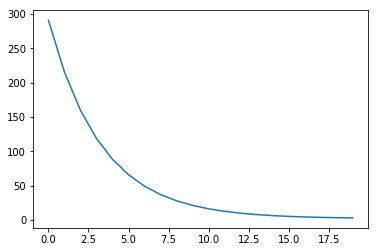

In [35]:
plt.plot(range(cost_mbgd.shape[0]), cost_mbgd)

Rascunho
===

In [ ]:
print(theta_mbgd)

In [ ]:
print(cost_mbgd)

In [ ]:
a = np.array([1,2])
b = np.random.rand((2))
print(l2_cost(np.array([1,2]), a,  b, 2 ))

In [ ]:
np.random.rand((2))

In [ ]:
print(float((1/(2*2)))*np.sum(a-b)**2)

In [ ]:
print((1.0/(2*2)))